## CIE 425 A1
# Huffman codes in python 
### Ezzat Eisawy 201901195
This an implementation for binary huffman codes using a tree and priority queue

## Part 1

#### I will need to use python built in priorty queue class and log2 for my calculations

In [27]:
from queue import PriorityQueue
from math import log2

### A class representation of the node that may carry the symbol

In [28]:
class node :
    """ A class we will use to represent a symbol node in the tree """
    left  = None
    right = None
    freq = None
    symbol = None

    def __init__(self ,freq, symbol = None, left = None , right = None ) -> None:
        self.left = left
        self.right = right
        self.symbol = symbol
        self.freq = freq
    
    def __lt__(self, nxt):
        """ Ovveriding the "Less than" class method so that the nodes can be compared by frequency and can be used easily in pq """
        return self.freq < nxt.freq
         

### creating a function for the huffman coding, the function takes a dictionary of symbols and their freqs/probs and returns a dictionary of symbols and their code as string

* At first the functions uses the frequency table to be represented as nodes and be put inside  a pq
* The idea of the function that it gets the lowest two nodes , makes them children of a parent node with the sum of their freqs/probs  and repeats till the tree is complete and no nodes left
* After the tree is completed it will be traversed using recursion (Here it's similar to dfs)
* The right child of the parent node is the lesser in freq and will be given symbol '0'

In [29]:
def huffman_code(freqs : dict) -> dict :
    """ Function the takes a dict of frequencies and returns  a dict of corrosponding coding """
    result_dict = freqs.copy()
    q = PriorityQueue()
    for symbol , freq in freqs.items() :
        q.put(node(symbol=symbol , freq= freq))
    node_right = None
    
    while  q.qsize() > 1 :    # q has at least 2 nodes left
        node_right = q.get()
        node_left = q.get()
        parent = node(freq= node_right.freq + node_left.freq , symbol= None , left= node_left , right= node_right )   
        q.put(parent)
        node_right = parent
    

    # traverse the tree to the coding , left --> 1 , right --> 0 , we will use recursion
    def traverse_node(nd :node ,init_code :str = '') :
        if nd.left :
            traverse_node(nd.left ,init_code+ '1')
        if nd.right :
            traverse_node(nd.right ,init_code+ '0')
        if not ( nd.left or nd.right) :  # node for symbol
            result_dict[nd.symbol] = init_code


    traverse_node(node_right)
    return result_dict        

#### Defining the dictionary of letters and their freqs

In [30]:
letterFrequency = {
    'E' : 12.0,
    'T' : 9.10,
    'A' : 8.12,
    'O' : 7.68,
    'I' : 7.31,
    'N' : 6.95,
    'S' : 6.28,
    'R' : 6.02,
    'H' : 5.92,
    'D' : 4.32,
    'L' : 3.98,
    'U' : 2.88,
    'C' : 2.71,
    'M' : 2.61,
    'F' : 2.30,
    'Y' : 2.11,
    'W' : 2.09,
    'G' : 2.03,
    'P' : 1.82,
    'B' : 1.49,
    'V' : 1.11,
    'K' : 0.69,
    'X' : 0.17,
    'Q' : 0.11,
    'J' : 0.10,
    'Z' : 0.07 
}

#### getting the result code table from the function I defined earlier

In [31]:
code_table = huffman_code(letterFrequency)
for i in code_table.items() :
    print(i)

('E', '011')
('T', '000')
('A', '1110')
('O', '1101')
('I', '1100')
('N', '1010')
('S', '1001')
('R', '1000')
('H', '0101')
('D', '11111')
('L', '10111')
('U', '01001')
('C', '01000')
('M', '00111')
('F', '00110')
('Y', '00100')
('W', '111101')
('G', '111100')
('P', '101101')
('B', '101100')
('V', '001010')
('K', '0010111')
('X', '001011011')
('Q', '001011010')
('J', '001011001')
('Z', '001011000')


#### Comparing the results optained from the function I wrote to the results optained using a python library for huffman coding (dahuffman)  https://github.com/soxofaan/dahuffman
Results are similar

In [32]:
%pip install dahuffman
from dahuffman import HuffmanCodec
# I need need to make a letter of my table a symbol for end of file and pass it to the function or else it will make extra symbol for it and put it in the table
letters_codec = HuffmanCodec.from_frequencies(letterFrequency ,eof= 'Z')  
letters_codec.print_code_table()

Bits Code      Value Symbol
   3 000           0 'T'
   5 00100         4 'Y'
   6 001010       10 'V'
   9 001011000    88 'Z'
   9 001011001    89 'J'
   9 001011010    90 'Q'
   9 001011011    91 'X'
   7 0010111      23 'K'
   5 00110         6 'F'
   5 00111         7 'M'
   5 01000         8 'C'
   5 01001         9 'U'
   4 0101          5 'H'
   3 011           3 'E'
   4 1000          8 'R'
   4 1001          9 'S'
   4 1010         10 'N'
   6 101100       44 'B'
   6 101101       45 'P'
   5 10111        23 'L'
   4 1100         12 'I'
   4 1101         13 'O'
   4 1110         14 'A'
   6 111100       60 'G'
   6 111101       61 'W'
   5 11111        31 'D'



#### Calculating the Entropy and avg code length
values of the frequency are devided by 100 to get the prob

In [33]:
english_entropy = sum([-x/100*log2(x/100) for x in letterFrequency.values()])
code_avg_length = sum([x/100*len(y) for x , y in zip(letterFrequency.values() , code_table.values())])

print('English entropy is' , english_entropy)
print('Average code length is ' , code_avg_length)
print('Efficiency = ' ,english_entropy/code_avg_length *100 ,'%' )

English entropy is 4.180788775300481
Average code length is  4.210900000000001
Efficiency =  99.28492187656985 %


## Part 2 

#### A simple function to encode the string using the code table

In [34]:
def encode_text(text : str , code_table : dict) :
    """ returns a string corresponding the input text with each character mapped to a value in the code table   """
    res = ''
    for s in text :
        if s  in code_table.keys() :
            res += str(code_table[s])
    return res

#### loading the file and calculating the length using the english language letter frequency
total length is 1990

In [35]:
f = open("Test1.txt", "r")
data = f.read()
symbol_code_table = huffman_code(letterFrequency)
encoded_data_english_freqs = encode_text(data , symbol_code_table)
print('total length with english freqs :',len(encoded_data_english_freqs))

total length with english freqs : 1990


## Part 3

#### A function to calculate the probs of letters in a given string

In [36]:
def calculate_probs(text : str) :
    """ returns a dictionary of characters in the input text and their probabilities """
    data_set = set(text)
    res_dict = dict()
    for i in data_set :
        res_dict[str(i)] = 0
    
    for i in text :
        res_dict[str(i)] +=1
    
    total = len(text)
    for key,val in res_dict.items():
        res_dict[key] = val/total
    
    return res_dict



#### Calculating the total length with the code table generated by the self optained probs 

In [37]:
calculated_probs = calculate_probs(data)
calculated_probs_code_table = huffman_code(calculated_probs)
encoded_data_calculated_probs = encode_text(data , calculated_probs_code_table)
print('total length with file freqs :',len(encoded_data_calculated_probs))


total length with file freqs : 1966


## Part 4

total length with english freqs : 1990
total length with file freqs : 1966


<BarContainer object of 2 artists>

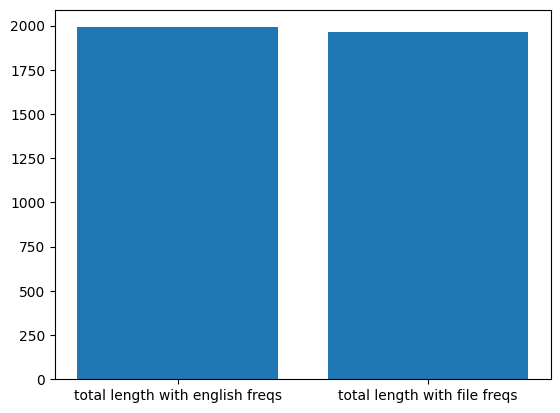

In [38]:
print('total length with english freqs :',len(encoded_data_english_freqs))
print('total length with file freqs :',len(encoded_data_calculated_probs))
import matplotlib.pyplot as plt
plt.bar(['total length with english freqs' , 'total length with file freqs'] , [len(encoded_data_english_freqs) , len(encoded_data_calculated_probs)])